# Distributions Exercises

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import scipy
from scipy import stats

In [2]:
az.style.use("arviz-darkgrid")
rng = np.random.default_rng(523)

# Exercise 1: Specifying distributions in code and sampling
## Part 1
Specify three distributions in SciPy
* A Binomial distribution of p=.8 and n=20
* A Poisson distribution with rate 10
* A Normal distribution with mean and standard deviation 20 

## Part 2
From each of the distributions in Exercise 1 take
* 10 random samples
* 30 random samples
* 10000 random samples

Then 
* Calculate the mean of each sample. How closely does it approximate the true mean you would expect?
* Plot the samples. How do the plots differ?

First step is quite straightforward, we just initialize the distributions with given parameters.
In case you don't know how the parameter is called in said distribution, you can always shift+tab while your cursor
is in the parenthesis, to get a prompt with documentation about the function you're about to use.

In [3]:
binomial = stats.binom(n=20, p=0.8)
poisson = stats.poisson(mu = 10)
normal = stats.norm(loc = 20, scale = 20)

To take samples from the distributions we can use rvs() function.
To better visualize our results from normal distribution, we can plot our samples using arviz's function plot_dist.
It will use either Kernel Density Estimates (KDEs) or histograms depending on the type of the input data.

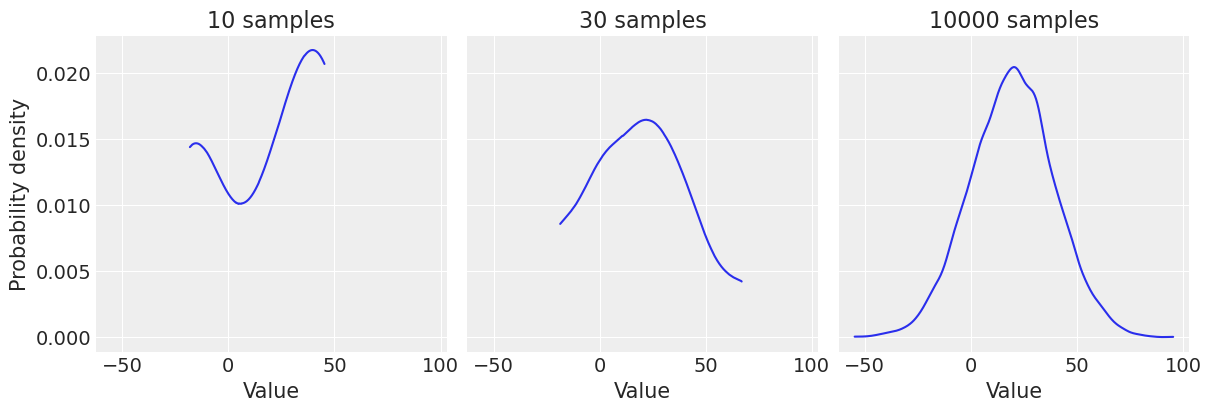

In [4]:
norm1 = normal.rvs(10, random_state=rng)
norm2 = normal.rvs(30, random_state=rng)
norm3 = normal.rvs(10000, random_state=rng)

fig, axes = plt.subplots(1,3, figsize=(12,4), sharey=True, sharex=True)
ax = axes[0]
az.plot_dist(norm1, ax=ax)
ax.set_title("10 samples")
ax.set_xlabel("Value")
ax.set_ylabel("Probability density")
ax = axes[1]
az.plot_dist(norm2, ax=ax)
ax.set_title("30 samples")
ax.set_xlabel("Value")
ax = axes[2]
az.plot_dist(norm3, ax=ax)
ax.set_title("10000 samples")
ax.set_xlabel("Value");

First thing we can notice here, is that samples containing 10 or 30 data points aren't always the same shape, whereas 10000 samples keeps the characteristic for gaussian distribution bell shape. Means of the datasets with few samples are quite random, try generating samples and plotting them few times, and you can see that with very few samples the plots are very different each time (except the plot for dataset with 10000 samples.)

Note: The notebook uses `rng = np.random.default_rng(523)` so that when restarting the kernel and runing all, the results are always the same. We'd need to set that in every cell if we wanted that repeating cells one by one always returned the same result.

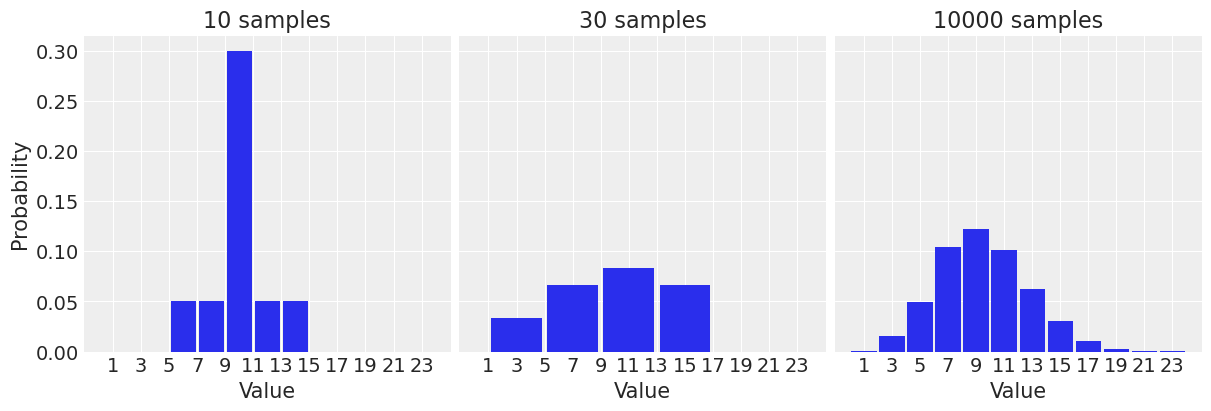

In [5]:
poiss1 = poisson.rvs(10, random_state=rng)
poiss2 = poisson.rvs(30, random_state=rng)
poiss3 = poisson.rvs(10000, random_state=rng)

fig, axes = plt.subplots(1,3, figsize=(12,4), sharey=True, sharex=True)
ax = axes[0]
az.plot_dist(poiss1, ax=ax)
ax.set_title("10 samples")
ax.set_xlabel("Value")
ax.set_ylabel("Probability")
ax = axes[1]
az.plot_dist(poiss2, ax=ax)
ax.set_title("30 samples")
ax.set_xlabel("Value")
ax = axes[2]
az.plot_dist(poiss3, ax=ax)
ax.set_title("10000 samples")
ax.set_xlabel("Value");

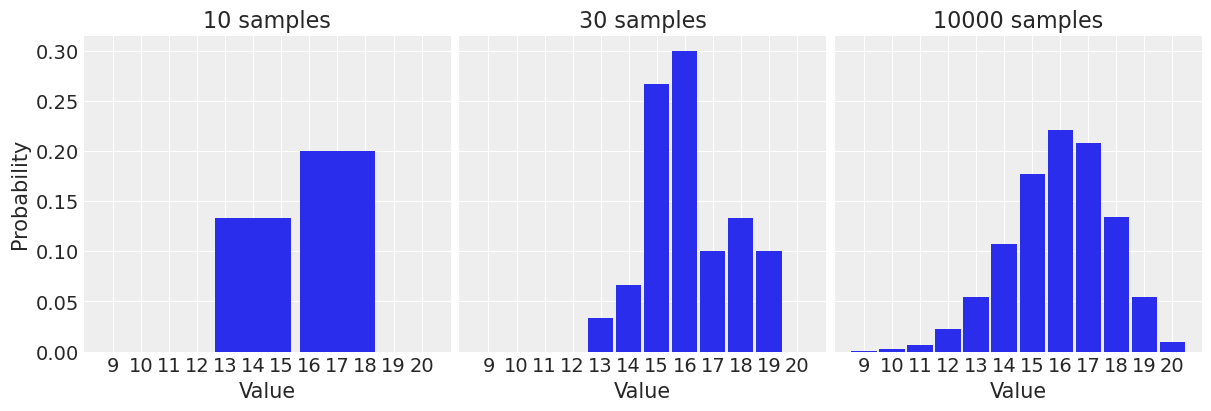

In [6]:
binom1 = binomial.rvs(10, random_state=rng)
binom2 = binomial.rvs(30, random_state=rng)
binom3 = binomial.rvs(10000, random_state=rng)

fig, axes = plt.subplots(1,3, figsize=(12,4), sharey=True, sharex=True)
ax = axes[0]
az.plot_dist(binom1, ax=ax)
ax.set_title("10 samples")
ax.set_xlabel("Value")
ax.set_ylabel("Probability")
ax = axes[1]
az.plot_dist(binom2, ax=ax)
ax.set_title("30 samples")
ax.set_xlabel("Value")
ax = axes[2]
az.plot_dist(binom3, ax=ax)
ax.set_title("10000 samples")
ax.set_xlabel("Value");

# Exercise 2: Calculate PMF and PDF
## Part 1
For just the Binomial distribution, calculate the probability mass value of {4, 16, 20} individually. Which value has the highest number, does this match you intuition?

If our binomial distribution has a chance of success of 80% and we're doing 20 experiments, then we can suspect that 16 will have the highest probability. 20 should hold 2nd place, and 4 should have very little probability.

In [7]:
print(f'probability of 4 : {binomial.pmf(4):.3g}')
print(f'probability of 20: {binomial.pmf(20):.3g}')
print(f'probability of 16: {binomial.pmf(16):.3g}')

probability of 4 : 1.3e-08
probability of 20: 0.0115
probability of 16: 0.218


## Part 2
For the Normal distribution, calculate the PDF from -20 to 60 using the `np.linspace` function to generate the x values. Plot PDF generated. Overlay this plot with the plot in Exercise 1. Do they match?

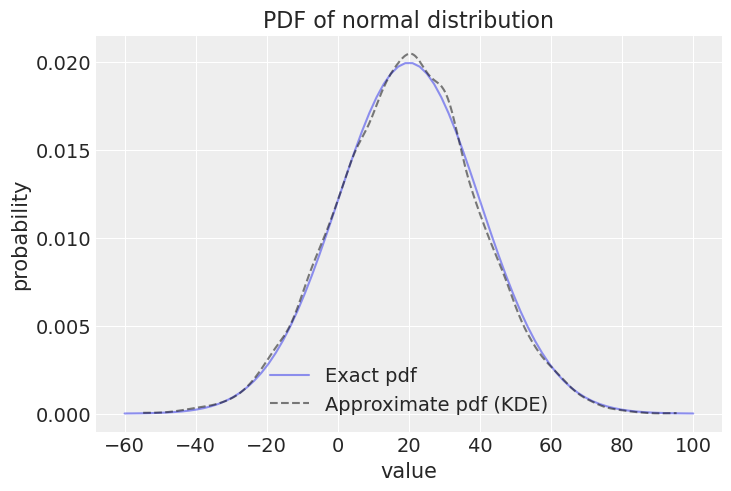

In [8]:
x = np.linspace(-60,100,80)
y = normal.pdf(x)

_, ax = plt.subplots()
ax.plot(x,y, label="Exact pdf", alpha=0.5)
az.plot_dist(norm3, ax=ax, color="k", plot_kwargs={"ls": "--", "alpha": .5}, label="Approximate pdf (KDE)")
ax.set_title("PDF of normal distribution")
ax.set_ylabel("probability")
ax.set_xlabel("value");

as you can see, the PDF for normal distribution looks exactly like a plot made out of really big number of samples out of that distribution. That property is something commonly used in MCMC method.

# Exercise 3: Reading Docs
## Part 1
Go the course references and find the SciPY and PyMC docs. Find the Poisson distribution in each. Is the parameterization the same?

## Part 2
Find two other distributions of the same name in both the PyMC and SciPY docs and compare the parameters. Do they match?

No they don't, the pymc Poisson takes in only mu parameter, whereas scipy accepts up to 4 
the differences continue in other distributions, but also interesting is that scipy distributions
are functional programming like. The distribution class only groups together all related functions, 
but doesn't need any params for initialization, they need to be provided to each function. 
pymc takes another route, using inheritance from Discrete class and using constructor that stores information
about given class parameters.

# Exercise 4: Connecting the two spaces
## Part 1
<center> <img src="img/ConnectedSpaces.png" width="1200"/></center>

Recreate the plot above using the code in the course, however update the parameter space so the observed space distribution mean is around 100

## Part 2
**Note**: This exercise is designed to be challenging. If you get this exercise however you will be very well prepared for the lesson thereafter

Let's say we sample the heights of people and we observe a Normal Distribution in centimeters. Perform the following tasks using SciPy:

**Task 1**

Specify a Normal distribution with 150 cm as the mean and 20 cm `N(150, 20)` as the standard deviation. Take 10000 samples and plot the observed values 

**Task 2**

Specify a Normal distribution but this time

* The mean is specified by another Normal distribution of  `N(150, 5)`
* The standard deviation is 20 cm
  
Take 10000 samples and plot both distributions. Label which one is the parameter distribution and which one is the observed distribution. *hint* You may run into shape issues.

Change the mean of the parameter distribution to 100 cm and see what happens. Do the same for the standard deviation of the parameter distribution.

**Task 3**

Specify a Normal distribution but this time

* The mean is specified by another Normal distribution of  `N(150, 5)`
* The standard deviation is a HalfNormal with standard deviation 15

Take 10000 samples and plot all three distributions. Write down conceptually why we are using a HalfNormal for standard deviation instead of a full normal. *Hint* Try using a Full normal for standard deviation and see what happens

## Part 1

In [9]:
num_customers_per_group = 286

# Specify a parameter distribution
beta_dist = stats.beta(40, 74.499)

# Spec parameter samples from beta distribution
conversion_rate_samples = beta_dist.rvs(10000, random_state=rng)

# Plug them into other binomial distribution
actual_conversion_samples = stats.binom(
    p=conversion_rate_samples, n=num_customers_per_group
).rvs(10000, random_state=rng)
actual_conversion_samples.mean()

100.0644

(0.0, 286.0)

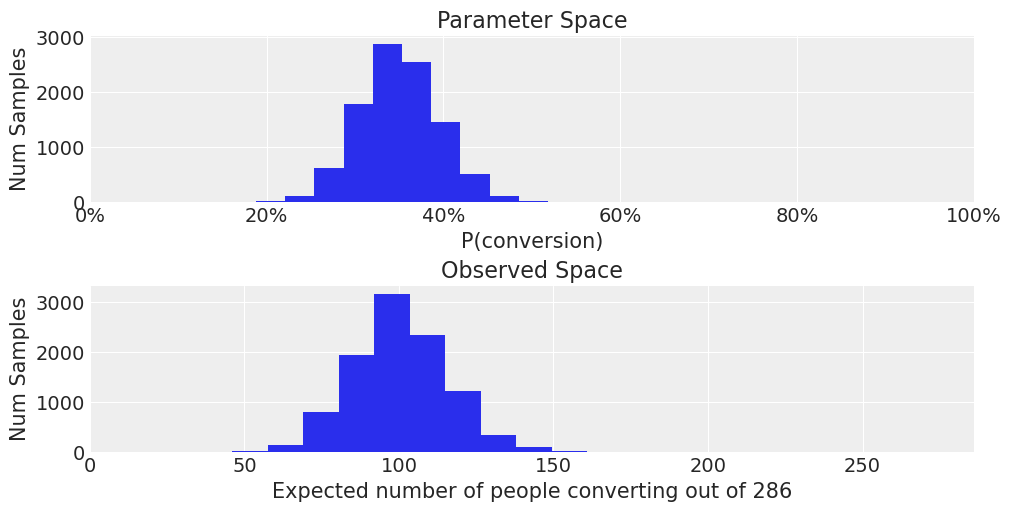

In [10]:
import matplotlib.ticker as mtick
fig, axes = plt.subplots(2, 1, figsize=(10, 5))


axes[0].hist(conversion_rate_samples)
axes[0].set_title("Parameter Space")
axes[0].set_xlabel("P(conversion)")
axes[0].set_ylabel("Num Samples")
axes[0].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None))


axes[1].hist(actual_conversion_samples)
axes[1].set_title("Observed Space")
axes[1].set_xlabel(
    f"Expected number of people converting out of {num_customers_per_group}"
)
axes[1].set_ylabel("Num Samples")

axes[0].set_xlim(0, 1)
axes[1].set_xlim(0, num_customers_per_group)


## Part 2

**Task 1**

In [11]:
# If you prefer histograms to KDE, you can uncomment the line below
az.rcParams["plot.density_kind"] = "kde"

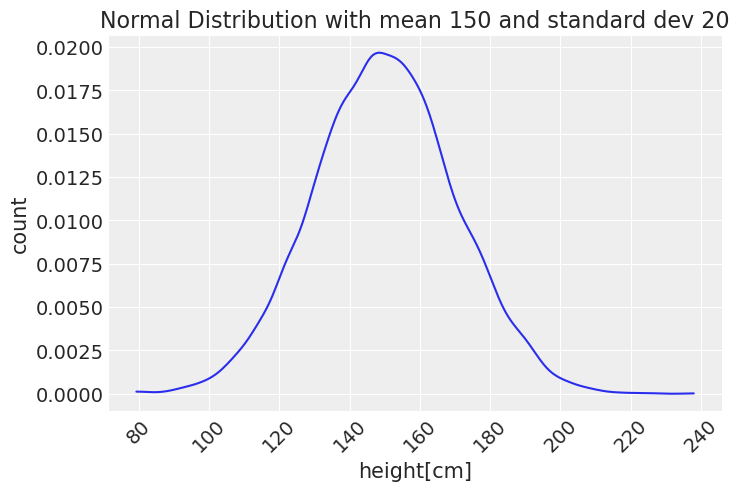

In [12]:
normal_dist = stats.norm(loc=150, scale=20).rvs(10000, random_state=rng)
az.plot_dist(normal_dist)
plt.title("Normal Distribution with mean 150 and standard dev 20")
plt.xticks(rotation=45)
plt.ylabel("count")
plt.xlabel("height[cm]");

**Task 2**

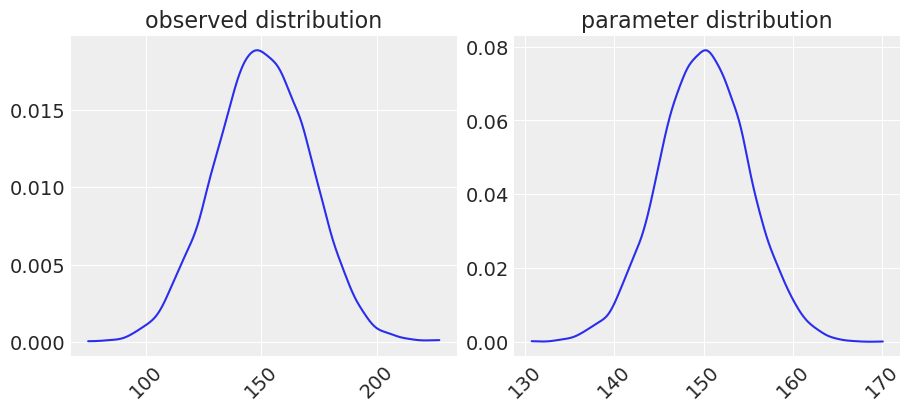

In [13]:
mean_dist = stats.norm(loc=150, scale=5).rvs(10000, random_state=rng)
normal_dist2 = stats.norm(loc = mean_dist, scale = 20).rvs(10000, random_state=rng)

fig, axes = plt.subplots(1,2, figsize=(9,4))
ax = axes[0]
az.plot_dist(normal_dist2, ax=ax)
ax.set_title("observed distribution")
ax.tick_params(axis="x", labelrotation=45)
ax = axes[1]
az.plot_dist(mean_dist, ax=ax)
ax.tick_params(axis="x", labelrotation=45)
ax.set_title("parameter distribution");

Change the mean of the parameter distribution to 100 cm and see what happens. Do the same for the standard deviation of the parameter distribution.

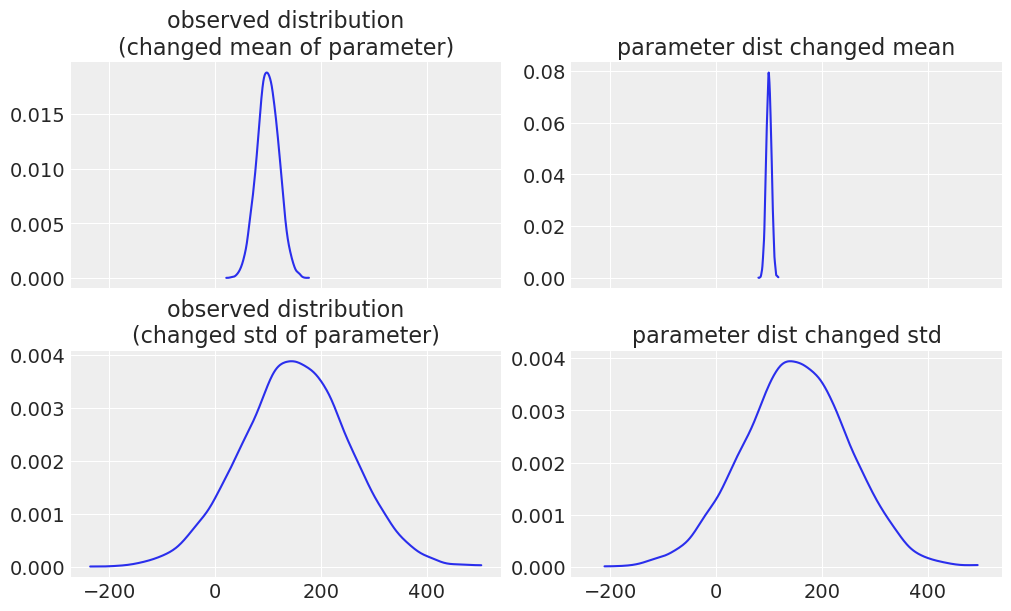

In [14]:
mean_dist_changed_mean = stats.norm(loc=100, scale=5).rvs(10000, random_state=rng)
mean_dist_changed_std = stats.norm(loc=150, scale=100).rvs(10000, random_state=rng)
observed2 = stats.norm(loc = mean_dist_changed_mean, scale = 20).rvs(10000, random_state=rng)
observed3 = stats.norm(loc = mean_dist_changed_std, scale = 20).rvs(10000, random_state=rng)

fig, axes = plt.subplots(2,2, figsize=(10,6), sharex=True)
ax = axes[0, 0]
az.plot_dist(observed2, ax=ax)
ax.set_title("observed distribution\n(changed mean of parameter)")
ax = axes[0, 1]
az.plot_dist(mean_dist_changed_mean, ax=ax)
ax.set_title("parameter dist changed mean")
ax = axes[1, 0]
az.plot_dist(observed3, ax=ax)
ax.set_title("observed distribution\n(changed std of parameter)")
ax = axes[1, 1]
az.plot_dist(mean_dist_changed_std, ax=ax)
ax.set_title("parameter dist changed std");

**Task 3**

In [15]:
mean_dist = stats.norm(loc=150, scale = 5).rvs(10000, random_state=rng)
std_dist = stats.halfnorm(scale=15).rvs(10000, random_state=rng)

normal_dist = stats.norm(loc = mean_dist, scale =std_dist).rvs(10000, random_state=rng)

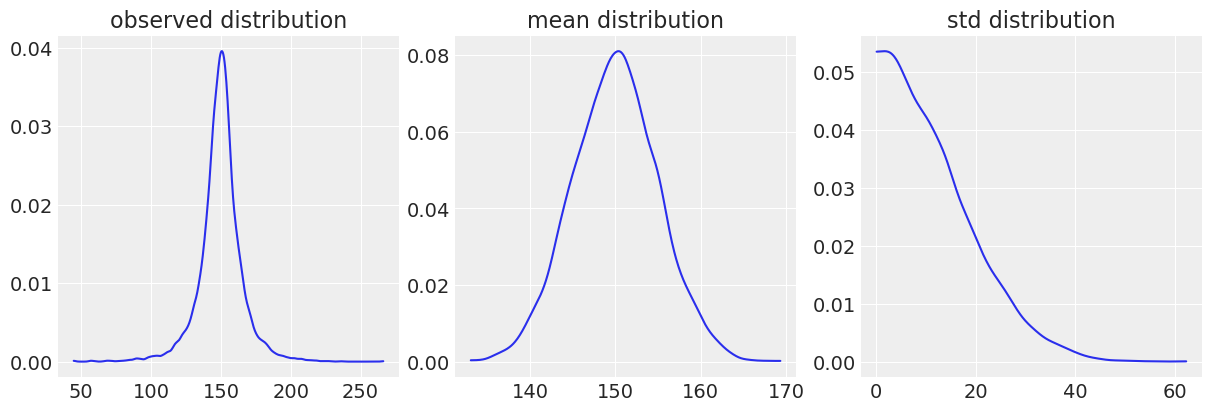

In [16]:
fig, axes = plt.subplots(1,3, figsize=(12,4))
ax = axes[0]
az.plot_dist(normal_dist, ax=ax)
ax.set_title("observed distribution")
ax = axes[1]
az.plot_dist(mean_dist, ax=ax)
ax.set_title("mean distribution")
ax = axes[2]
az.plot_dist(std_dist, ax=ax)
ax.set_title("std distribution");

> Write down conceptually why we are using a HalfNormal for standard deviation instead of a full normal. *Hint* Try using a Full normal for standard deviation and see what happens

If you've tried drawing standard deviation values from the normal distribution, most likely you've seen value error being returned. 
The standard deviation, being a measure of spread or dispersion of a set of values, is always positive or zero. It represents the square root of the variance of a set of values, which is also always positive or zero by definition. Negative standard deviations are not possible because it would imply a negative spread or dispersion, which is not a meaningful concept in statistics.

Below we try using a full normal, and see how we run into a domain error due to trying to use negative values as standard deviations:

In [17]:
mean_dist = stats.norm(loc=150, scale = 5).rvs(10000, random_state=rng)
std_dist = stats.norm(loc=0, scale=15).rvs(10000, random_state=rng)

normal_dist = stats.norm(loc = mean_dist, scale =std_dist).rvs(10000, random_state=rng)

ValueError: Domain error in arguments. The `scale` parameter must be positive for all distributions, and many distributions have restrictions on shape parameters. Please see the `scipy.stats.norm` documentation for details.